# Test ipympl Download Button with rcParams

This notebook tests that the Download button respects matplotlib's `savefig.*` rcParams.

**Issues being tested:**
- #138: Download button should respect `savefig.format`
- #234: Download button should respect `savefig.transparent` and `savefig.facecolor`
- #339: Enable PDF downloads for vector graphics

**How to test:**
1. Run each cell
2. Click the Download button (floppy disk icon) in the toolbar
3. Check the downloaded file has the correct format and properties

In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

## Test 1: Default Behavior (PNG)

Without setting any rcParams, the download should default to PNG format.

In [ ]:
# Reset to defaults
# plt.rcdefaults()

fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [1, 4, 2, 3], 'ro-')
ax.set_title('Test 1: Default PNG')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
plt.show()

# Expected: Downloads as 'Figure 1.png'

## Test 2: PDF Format

Setting `savefig.format = 'pdf'` should download as PDF (vector graphics).

In [ ]:
plt.rcParams['savefig.format'] = 'pdf'

fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi, 100)
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')
ax.set_title('Test 2: PDF Format')
ax.legend()
plt.show()

# Expected: Downloads as 'Figure 2.pdf'
# Can verify it's a real PDF by opening in a PDF viewer

## Test 3: SVG Format

Setting `savefig.format = 'svg'` should download as SVG (vector graphics).

In [ ]:
plt.rcParams['savefig.format'] = 'svg'

fig, ax = plt.subplots()
categories = ['A', 'B', 'C', 'D']
values = [23, 45, 56, 78]
ax.bar(categories, values, color='steelblue')
ax.set_title('Test 3: SVG Format')
ax.set_ylabel('Values')
plt.show()

# Expected: Downloads as 'Figure 3.svg'
# Can verify it's SVG by opening in text editor - should see XML

## Test 4: Transparent Background (PNG)

Setting `savefig.transparent = True` should create PNG with transparent background.

In [ ]:
plt.rcParams['savefig.format'] = 'png'
plt.rcParams['savefig.transparent'] = True

fig, ax = plt.subplots()
fig.patch.set_facecolor('red')  # Set red background in notebook
ax.plot([1, 2, 3, 4], [2, 4, 1, 3], 'go-', linewidth=2)
ax.set_title('Test 4: Transparent Background')
plt.show()

# Expected: Downloads as 'Figure 4.png'
# Background should be TRANSPARENT, not red
# Can verify by opening PNG in image viewer with transparency support

## Test 5: Custom Face Color

Setting `savefig.facecolor` should use that background color.

In [ ]:
plt.rcParams['savefig.format'] = 'png'
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.facecolor'] = '#111111'  # Dark gray

fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [1, 3, 2, 4], 'y-', linewidth=3)
ax.set_title('Test 5: Dark Background', color='white')
ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.show()

# Expected: Downloads as 'Figure 5.png'
# Background should be dark gray (#111111)

## Test 6: High DPI PNG

Setting `savefig.dpi` should affect resolution of raster formats.

In [ ]:
plt.rcParams['savefig.format'] = 'png'
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['savefig.dpi'] = 300  # High resolution

fig, ax = plt.subplots(figsize=(6, 4))
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x) * np.exp(-x/10), 'b-')
ax.set_title('Test 6: High DPI (300)')
ax.grid(True, alpha=0.3)
plt.show()

# Expected: Downloads as 'Figure 6.png'
# File should be larger than test 1 (higher resolution)
# Dimensions should be ~1800x1200 pixels (6*300 x 4*300)

## Test 7: JPEG Format

Setting `savefig.format = 'jpg'` should download as JPEG.

In [ ]:
plt.rcParams['savefig.format'] = 'jpg'
plt.rcParams['savefig.dpi'] = 'figure'  # Reset to default

fig, ax = plt.subplots()
ax.scatter(np.random.randn(100), np.random.randn(100), 
           c=np.random.randn(100), cmap='viridis', s=100, alpha=0.6)
ax.set_title('Test 7: JPEG Format')
plt.colorbar(ax.collections[0], ax=ax)
plt.show()

# Expected: Downloads as 'Figure 7.jpg'
# JPEG format (lossy compression, no transparency support)

## Test 8: Verify Backward Compatibility

If we somehow call the old code path, it should still work.

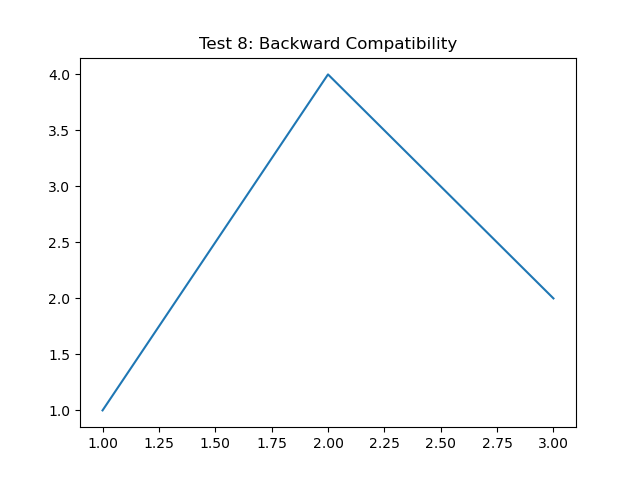

Regular savefig to /tmp/test_savefig.png works


In [9]:
plt.rcdefaults()
# Test that default matplotlib savefig still works
fig, ax = plt.subplots()
ax.plot([1, 2, 3], [1, 4, 2])
ax.set_title('Test 8: Backward Compatibility')
plt.show()

# Use regular savefig to compare
plt.savefig('test_savefig.png')
print("Regular savefig to /tmp/test_savefig.png works")

# Now test the widget button
# Expected: Downloads as 'Figure 8.jpg' (jpg still set from Test 7)

## Verification Checklist

After running all tests and clicking Download on each figure, verify:

- [ ] Test 1: File named `Figure 1.png`, PNG format
- [ ] Test 2: File named `Figure 2.pdf`, can open in PDF viewer
- [ ] Test 3: File named `Figure 3.svg`, can open as text/XML
- [ ] Test 4: File named `Figure 4.png`, has transparent background
- [ ] Test 5: File named `Figure 5.png`, has dark (#111111) background
- [ ] Test 6: File named `Figure 6.png`, is high resolution (~1800x1200)
- [ ] Test 7: File named `Figure 7.jpg`, JPEG format
- [ ] Test 8: File named `Figure 8.jpg`, downloads successfully

All tests passing indicates rcParams are properly respected! 🎉